# PROJECT : Using Decision Tree to understand Road accident in Songkran Festival

### GROUP : 
#### 1. Arunwat Moonbung        | 6131501066
#### 2. Natthida Patlee         | 6131501016
#### 3. Nattawadee Philuekruang | 6131501021
#### 3. Piya Jairat             | 6131501035
#### 4. Wirakan Keawkanya       | 6131501054


### INCLUDE ALL IMPORTANT LIBRARY INTO PROJECT HERE

In [15]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### IMPORT songkran.csv file

In [16]:
songkran_original_dataset = pd.read_csv('songkran.csv',engine='python')

## Data Pre-processing

## Basic Exploration and Data Cleaning
### Number of Row x Columns, data types and statistic

In [17]:
#dtypes display maximum 150 columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
display("Number of Row x Columns of Original dataset", songkran_original_dataset.shape)
display("Columns and their data types",songkran_original_dataset.dtypes)

'Number of Row x Columns of Original dataset'

(202298, 19)

'Columns and their data types'

Year                      object
ProvinceCode               int64
Province                  object
HospitalCode               int64
HospitalName              object
Date                       int64
Time                      object
Sex                       object
Age                      float64
AccidentPlace             object
CasualtyStatus            object
CasualtyVehicle           object
DisputantVehicle          object
PreventiveMeasure         object
Alchohol                  object
TransferMethod            object
Refer-Admit               object
Status                    object
NumberOfTreatmentDays      int64
dtype: object

In [18]:
display("Statistic of numeric features", songkran_original_dataset.describe())
display("Statistic of category features", songkran_original_dataset.describe(include=['object']))

'Statistic of numeric features'

ProvinceCode   HospitalCode           Date            Age  \
count  202298.000000  202298.000000  202298.000000  199457.000000   
mean       48.358733   11332.568770      13.699068      25.697103   
std        24.091981    1384.988602       1.810722      17.011527   
min        10.000000   10660.000000      10.000000       1.000000   
25%        30.000000   10772.000000      12.000000      15.000000   
50%        47.000000   11048.000000      13.000000      22.000000   
75%        67.000000   11330.000000      15.000000      36.000000   
max        97.000000   34563.000000      18.000000      99.000000   

       NumberOfTreatmentDays  
count          202298.000000  
mean                0.296686  
std                 1.610224  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                31.000000

'Statistic of category features'

Year           Province HospitalName            Time     Sex  \
count        202298             202298       202298          200762  202298   
unique            7                146         1260              24       2   
top     สงกรานต์ 51  Nakhon Ratchasima     บางละมุง  17:01-18:00 น.    Male   
freq          32328               9076         1143           16997  133065   

       AccidentPlace CasualtyStatus CasualtyVehicle DisputantVehicle  \
count         197029         200538          198949           189082   
unique             3              4              11               11   
top      Countryside          Rider      Motorcycle             None   
freq          104167         129116          153601           115288   

       PreventiveMeasure Alchohol     TransferMethod Refer-Admit   Status  
count             189895   190023             202298      202298   202298  
unique                 3        2                  9           2        2  
top                 None       No  Victim / Relative          No  Injured  
freq              161577   120957             127992      155300   199350

### Basic Exploration | Observing Missing Value in Columns
### Since all columns has missing value less than 50%, No Columns are removed!

In [19]:
display('Missing Value in each Columns')
display(songkran_original_dataset.isnull().sum(axis=0)/len(songkran_original_dataset)*100)

'Missing Value in each Columns'

Year                     0.000000
ProvinceCode             0.000000
Province                 0.000000
HospitalCode             0.000000
HospitalName             0.000000
Date                     0.000000
Time                     0.759276
Sex                      0.000000
Age                      1.404364
AccidentPlace            2.604573
CasualtyStatus           0.870004
CasualtyVehicle          1.655479
DisputantVehicle         6.532937
PreventiveMeasure        6.131054
Alchohol                 6.067781
TransferMethod           0.000000
Refer-Admit              0.000000
Status                   0.000000
NumberOfTreatmentDays    0.000000
dtype: float64

## Univariate Analysis
### Categorical features

In [20]:
songkran_categorical_dataset = songkran_original_dataset.select_dtypes(include=['object'])
display(songkran_categorical_dataset.columns)
display(songkran_categorical_dataset.shape)

Index(['Year', 'Province', 'HospitalName', 'Time', 'Sex', 'AccidentPlace',
       'CasualtyStatus', 'CasualtyVehicle', 'DisputantVehicle',
       'PreventiveMeasure', 'Alchohol', 'TransferMethod', 'Refer-Admit',
       'Status'],
      dtype='object')

(202298, 14)

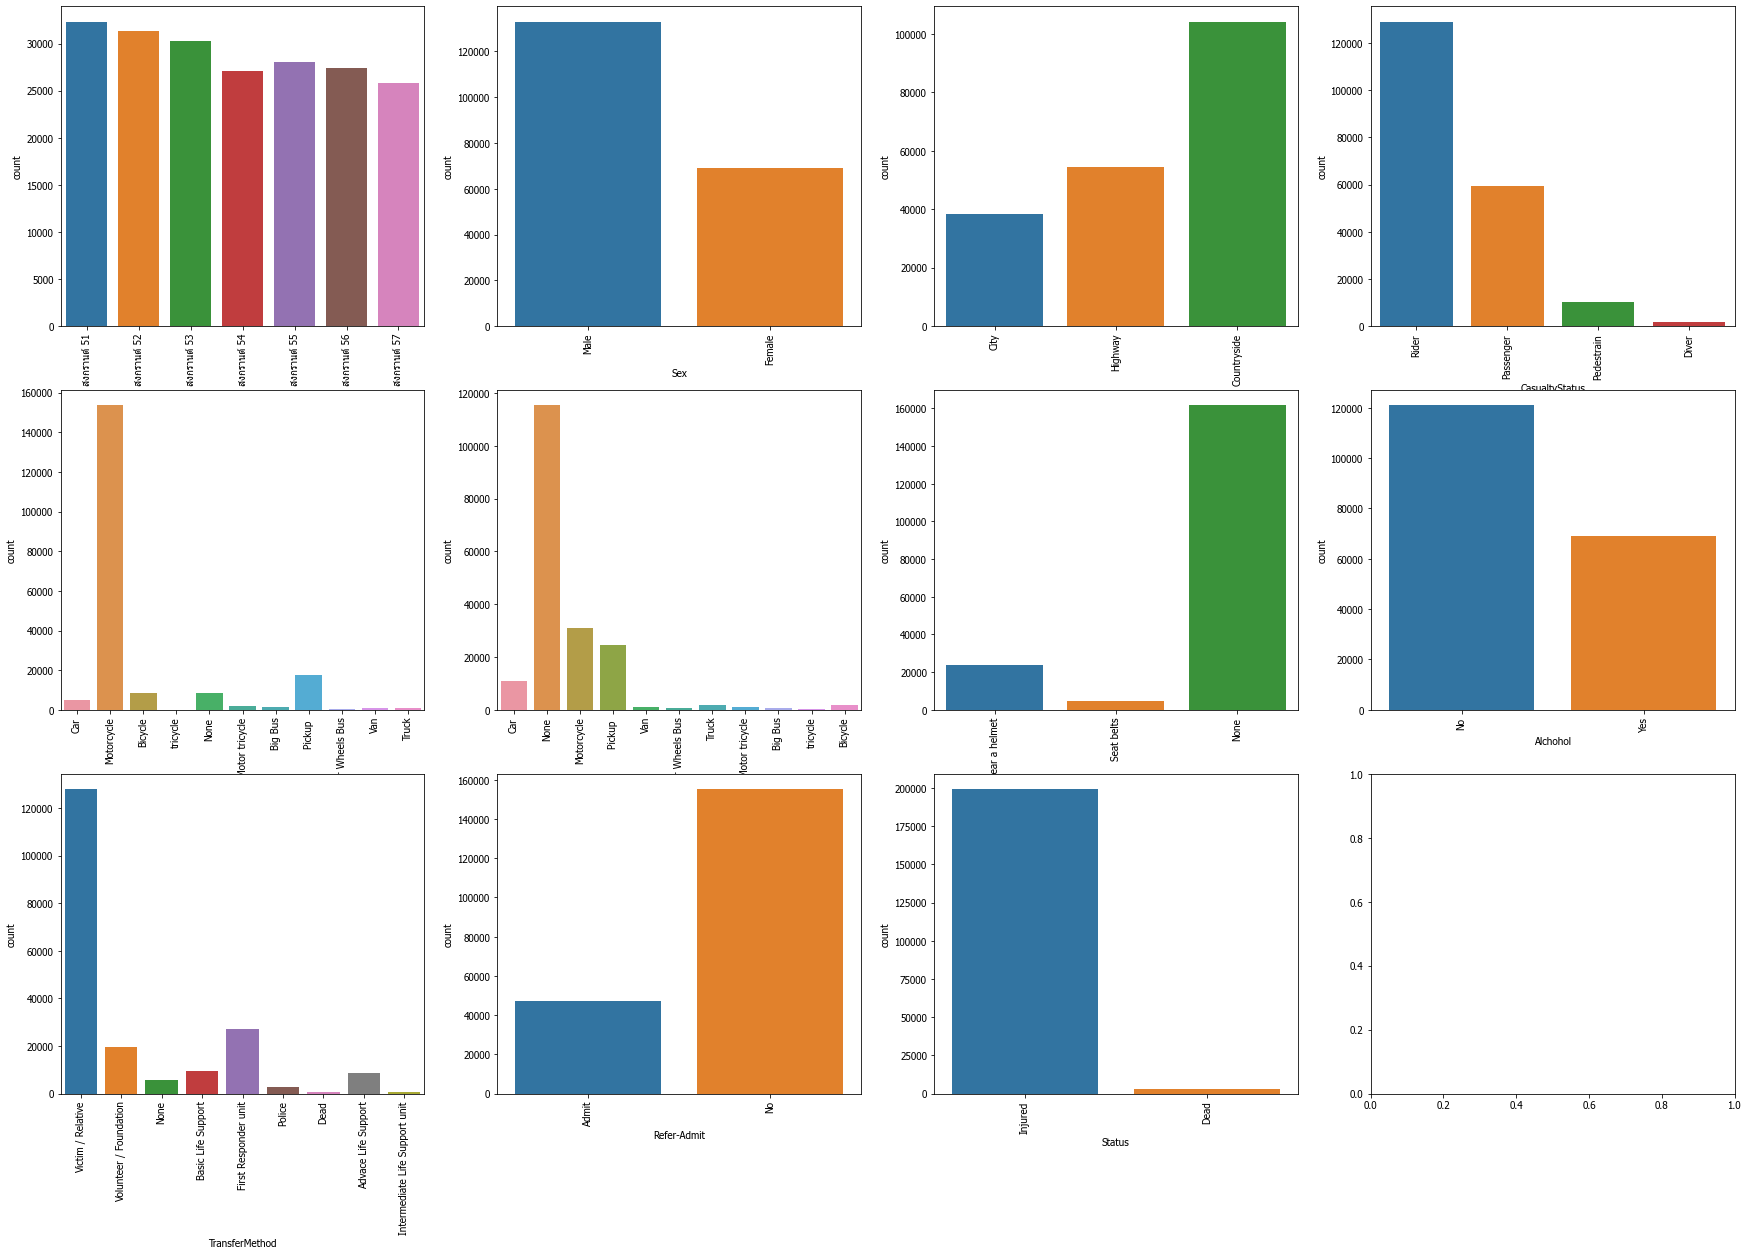

In [21]:
songkran_categorical_group_1 = ['Year', 'Sex', 'AccidentPlace','CasualtyStatus', 'CasualtyVehicle', 'DisputantVehicle',
                                'PreventiveMeasure', 'Alcohol', 'TransferMethod', 'Refer-Admit', 'Status']

fig, ax = plt.subplots(3, 4, figsize=(30,20))
for i, subplot in zip(songkran_categorical_group_1, ax.flatten()):
        chart = sb.countplot(songkran_categorical_dataset[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

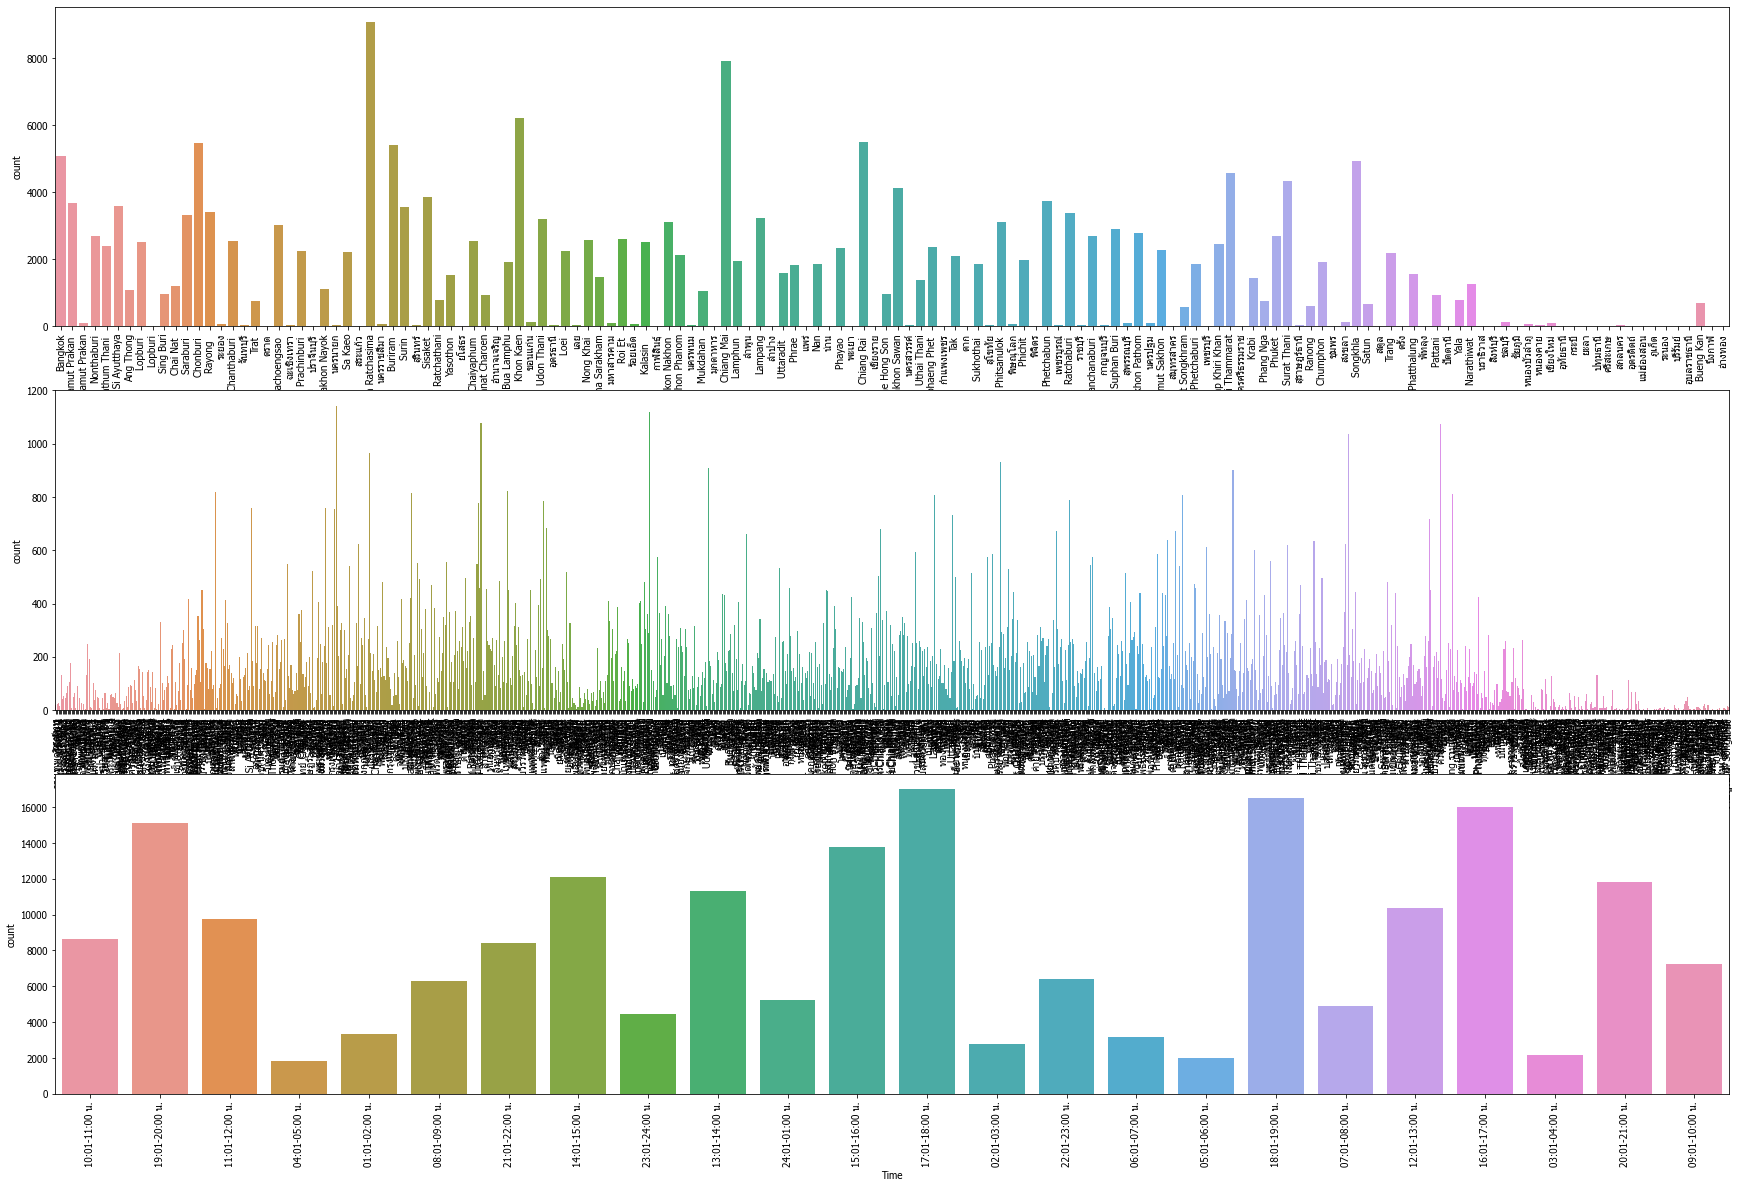

In [22]:
songkran_categorical_group_2 = ['Province', 'HospitalName', 'Time']

fig, ax = plt.subplots(3, 1, figsize=(30,20))
for i, subplot in zip(songkran_categorical_group_2, ax.flatten()):
        chart = sb.countplot(songkran_categorical_dataset[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Numerical features

In [23]:
songkran_numerical_dataset = songkran_original_dataset.select_dtypes(include=['number'])
display(songkran_numerical_dataset.columns)
display(songkran_numerical_dataset.shape)

Index(['ProvinceCode', 'HospitalCode', 'Date', 'Age', 'NumberOfTreatmentDays'], dtype='object')

(202298, 5)

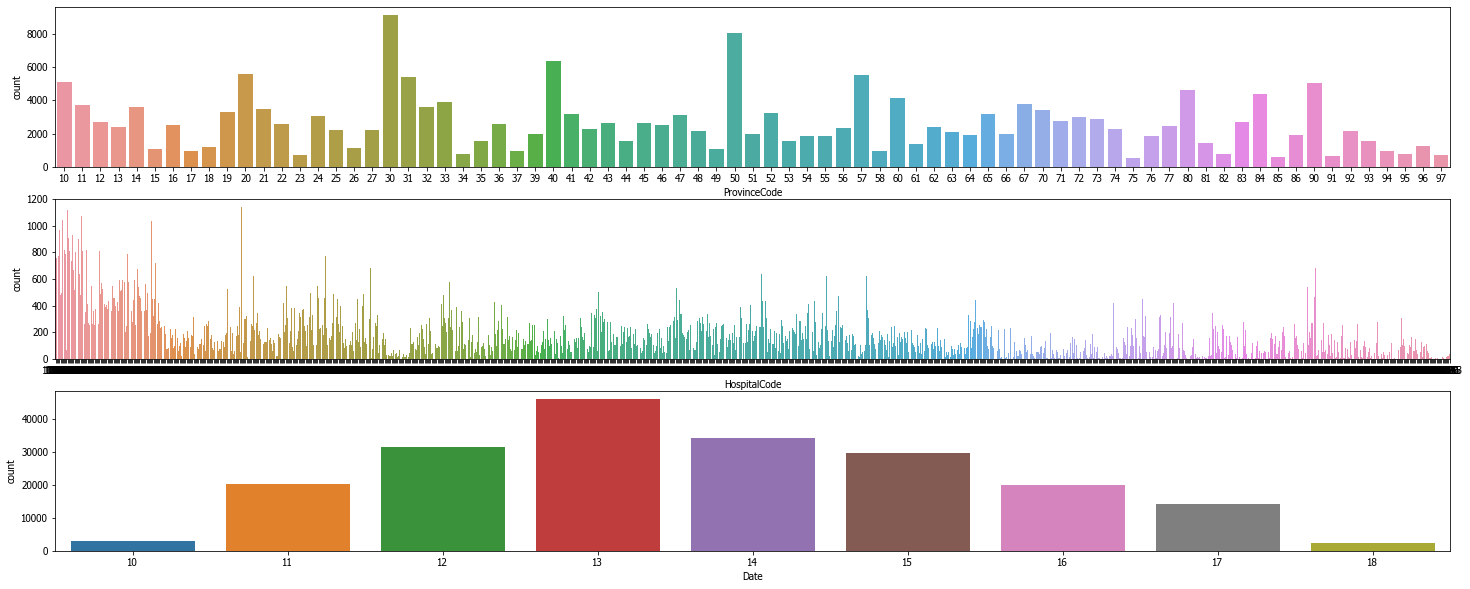

In [24]:
songkran_numerical_group_1 = ['ProvinceCode', 'HospitalCode', 'Date']
fig, ax = plt.subplots(3, 1, figsize=(25,10))
for i, subplot in zip(songkran_numerical_group_1, ax.flatten()):
        chart = sb.countplot(songkran_numerical_dataset[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

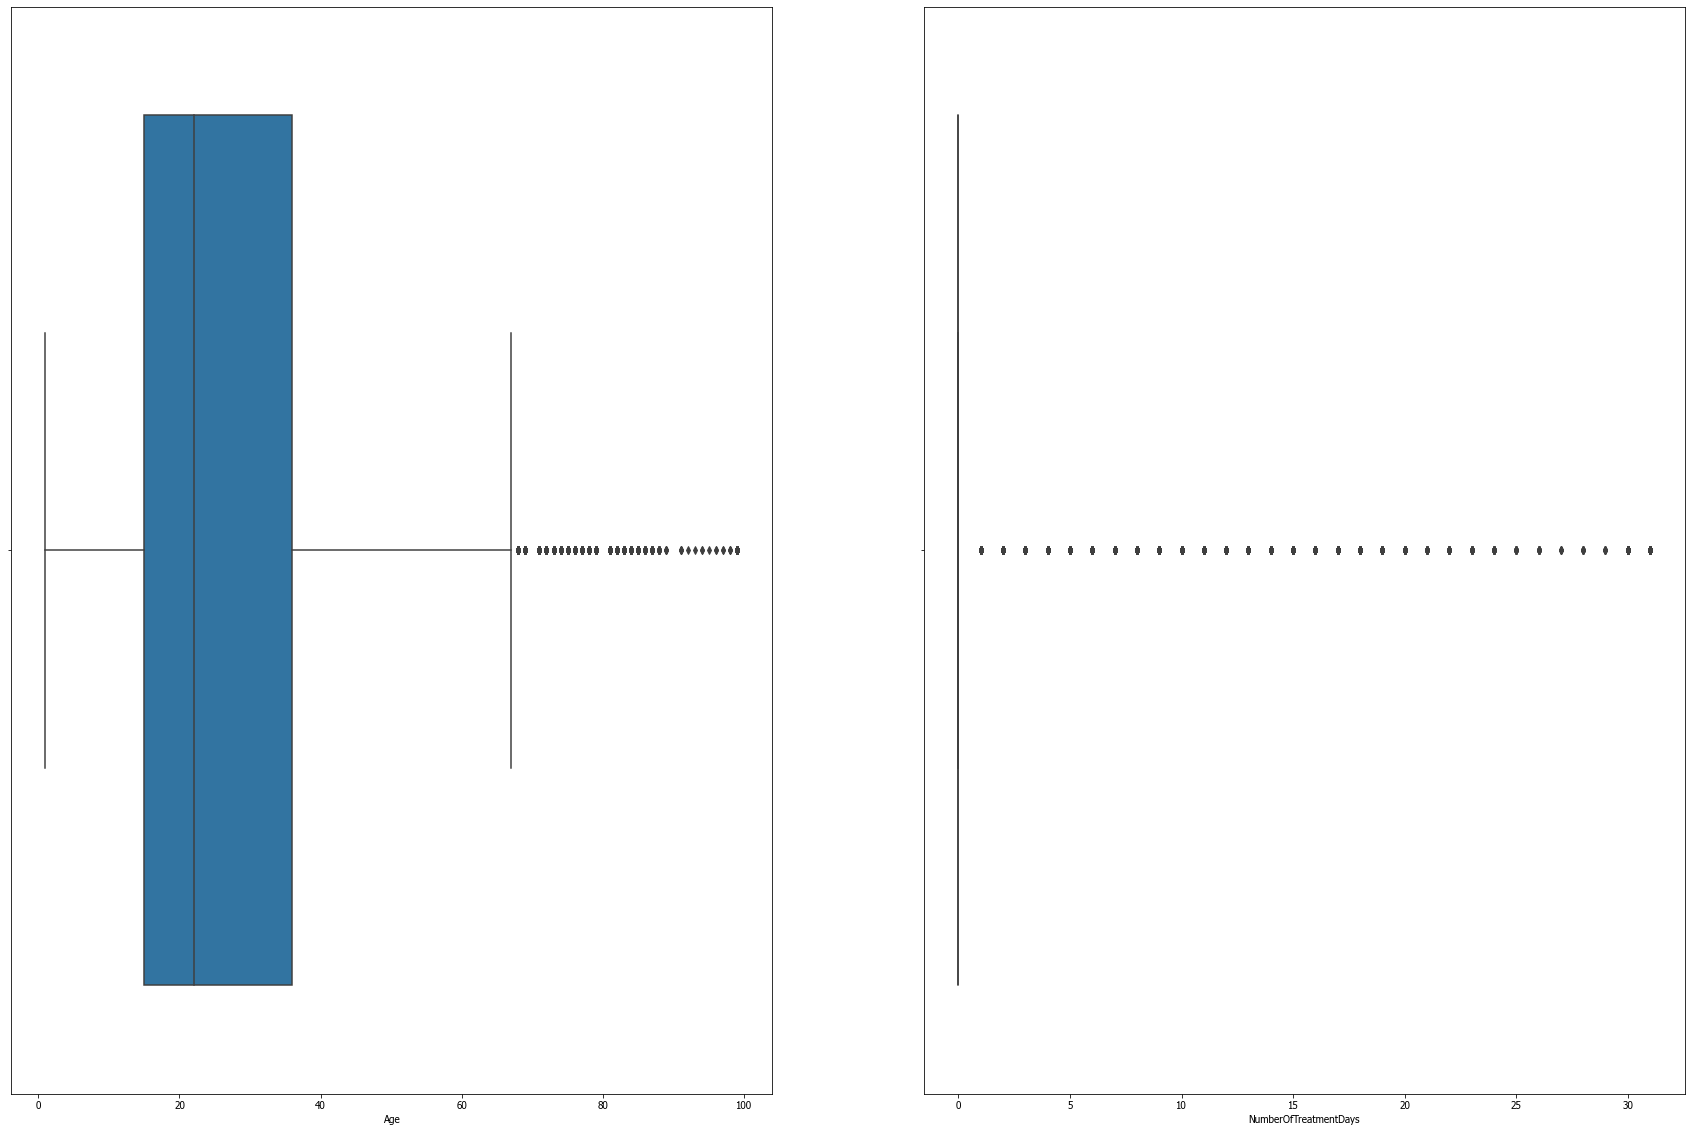

In [25]:
songkran_numerical_group_2 = ['Age', 'NumberOfTreatmentDays']
fig, ax = plt.subplots(1, 2, figsize=(30,20))
for i, subplot in zip(songkran_numerical_group_2, ax.flatten()):
        boxplot = sb.boxplot(songkran_numerical_dataset[i], ax=subplot)

## Data cleansing after Univariate Analysis
### Remove Scope and Duplicate meaning and Irrevant of Columns and Row
### Irrelavant Columns
#### 1. Year : This columns only indicated the year which the accident is happened. Doesn't useful when using predict and can't be factor of dead
#### 2. Date : This columns only indicated the day which the accident is happend. Doesn't useful when using for prediction
### Duplicate Meaning Columns (Columns which has the same meaning but represented in differnt format or language)
#### 1. ProvinceCode & Province 
#### -> Delete both of them since province doesn't tell us whether injured person will die or not
#### 2. HospitalCode & HospitalName
#### -> Delete HospitalCode | Hospital doesn't tell us whether injured person will die or not

In [26]:
songkran_deleted_columns = ['Year', 'Date','ProvinceCode','Province','HospitalCode','HospitalName']
for i in songkran_deleted_columns:
    if i in songkran_deleted_columns:
        songkran_original_dataset = songkran_original_dataset.drop(columns=[i])
        print("Execute : Delete Columns ", i)
    else:
        pass

display(songkran_original_dataset.shape)

Execute : Delete Columns  Year
Execute : Delete Columns  Date
Execute : Delete Columns  ProvinceCode
Execute : Delete Columns  Province
Execute : Delete Columns  HospitalCode
Execute : Delete Columns  HospitalName


(202298, 13)

## Bivariate Analysis?
### Count plot between a categorical feature and class


In [27]:
songkran_original_dataset.columns

Index(['Time', 'Sex', 'Age', 'AccidentPlace', 'CasualtyStatus',
       'CasualtyVehicle', 'DisputantVehicle', 'PreventiveMeasure', 'Alchohol',
       'TransferMethod', 'Refer-Admit', 'Status', 'NumberOfTreatmentDays'],
      dtype='object')

In [28]:
songkran_countplot_group_1 = ['Sex','AccidentPlace', 'CasualtyStatus','CasualtyVehicle', 'DisputantVehicle', 'PreventiveMeasure', 'Alcohol','TransferMethod', 'Refer-Admit']
songkran_countplot_group_2 = ['Time','NumberOfTreatmentDays','Age']

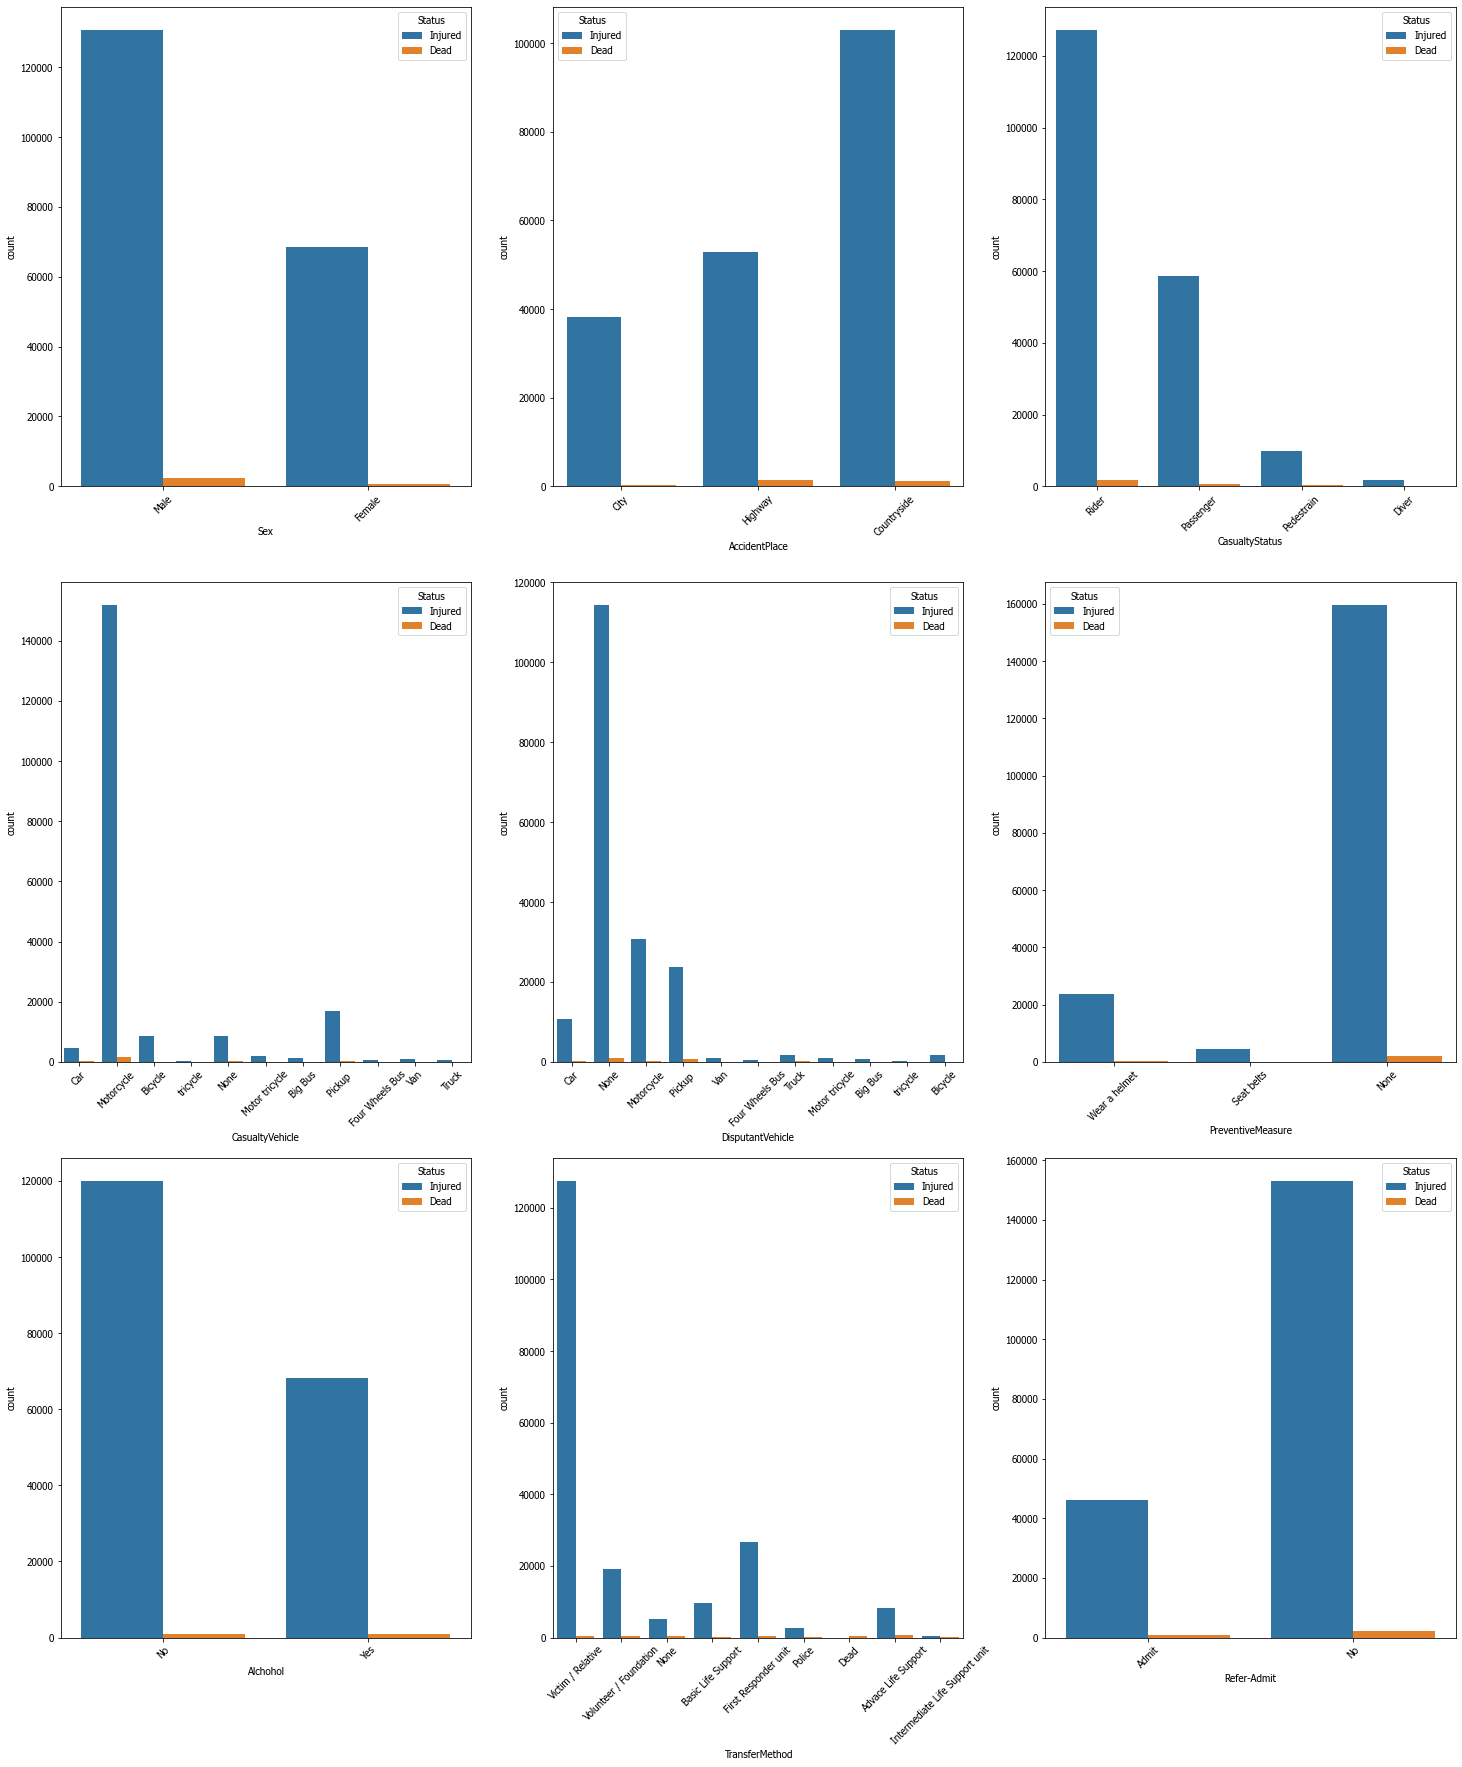

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(25,30))
for i, subplot in zip(songkran_countplot_group_1, ax.flatten()):
        chart = sb.countplot(data=songkran_original_dataset, x=i, hue='Status',ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

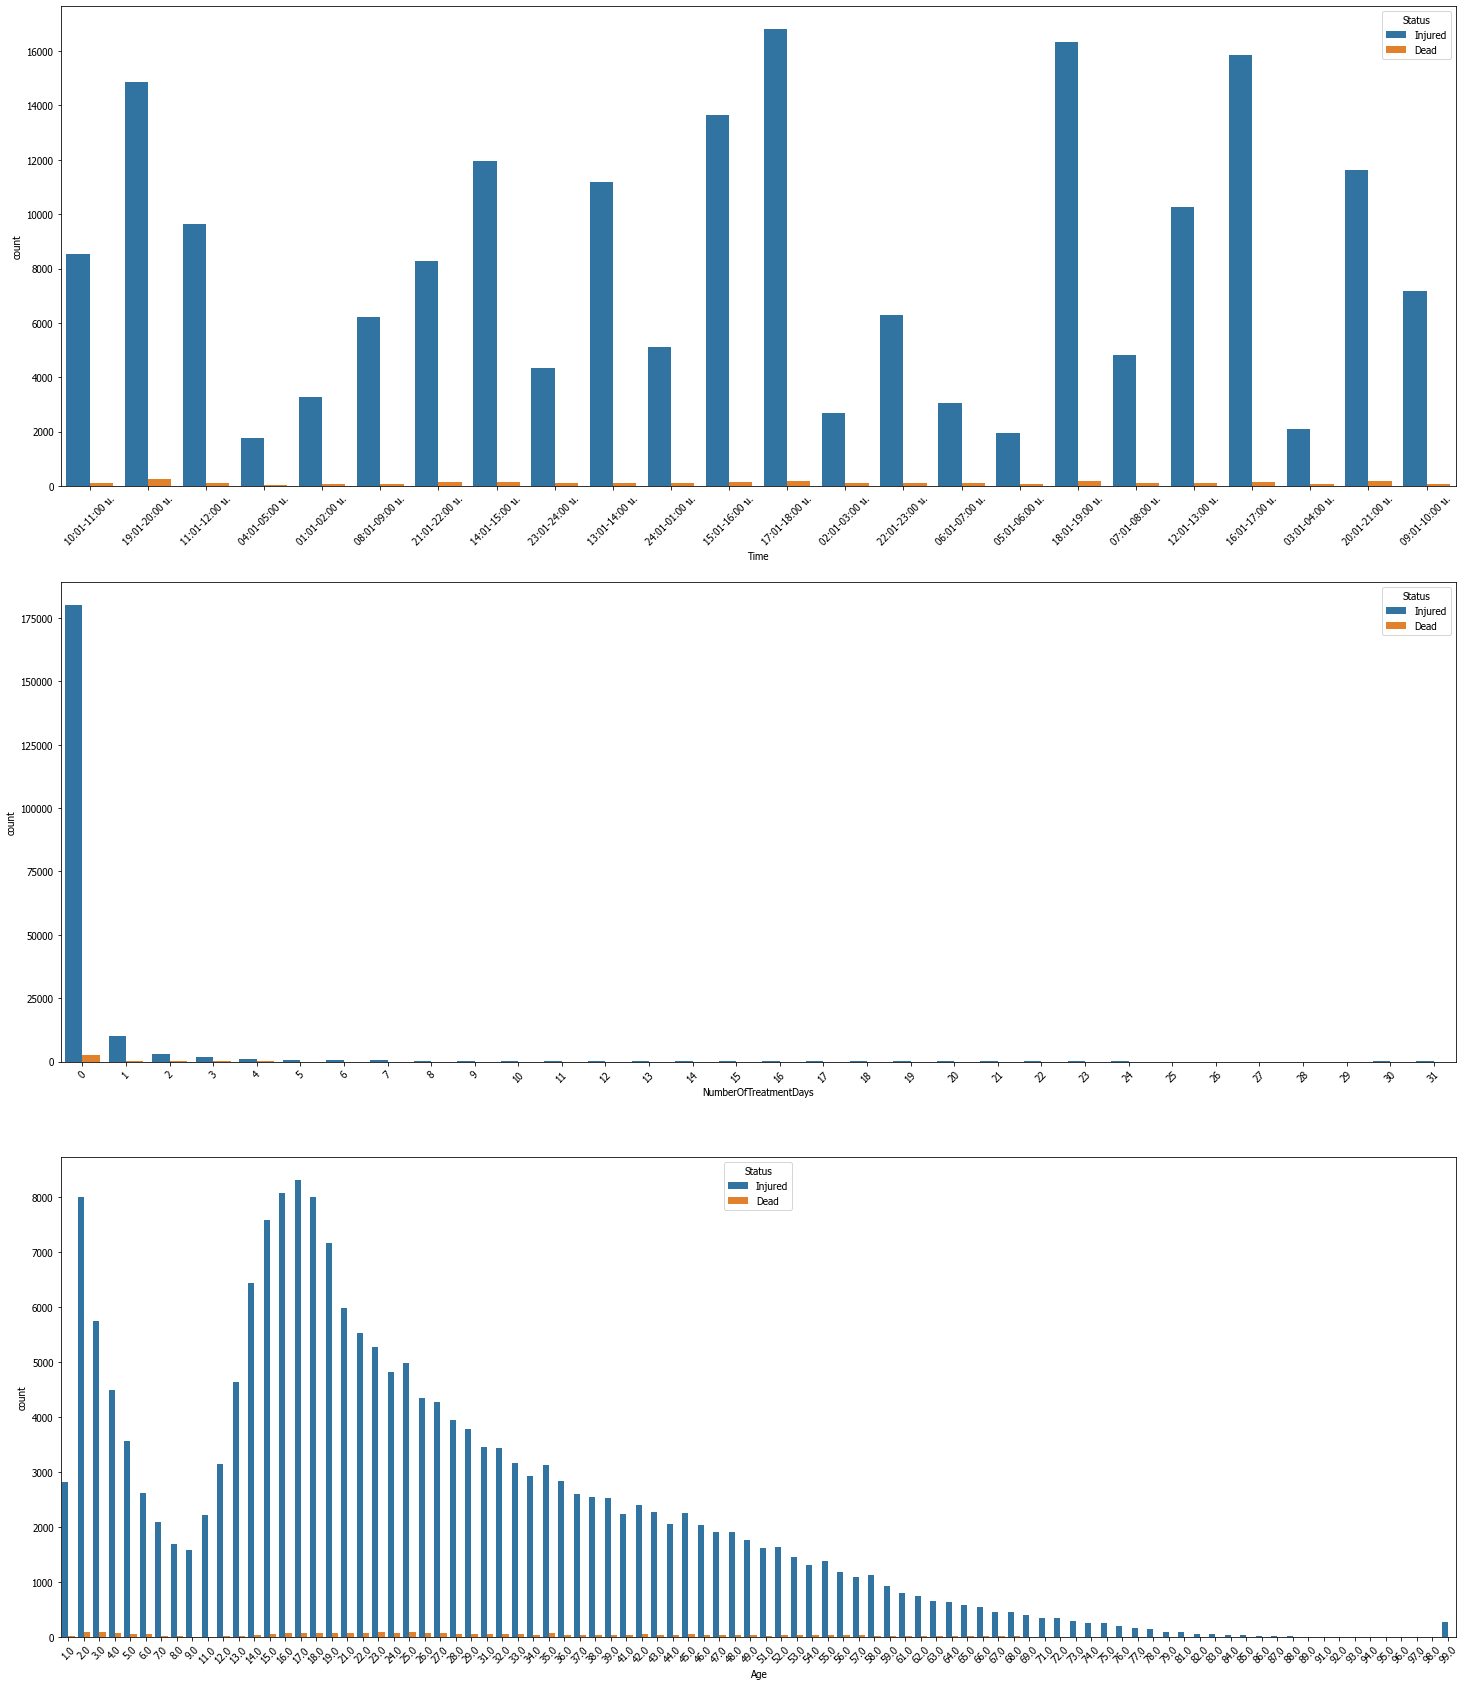

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(25,30))
for i, subplot in zip(songkran_countplot_group_2, ax.flatten()):
        chart = sb.countplot(data=songkran_original_dataset, x=i, hue='Status',ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

## Data Cleaning (Fixing unsual data in any columns)


In [33]:
display('Missing Value in each Columns')
display(songkran_original_dataset.isnull().sum(axis=0)/len(songkran_original_dataset)*100)

'Missing Value in each Columns'

Time                     0.759276
Sex                      0.000000
Age                      1.404364
AccidentPlace            2.604573
CasualtyStatus           0.870004
CasualtyVehicle          1.655479
DisputantVehicle         6.532937
PreventiveMeasure        6.131054
Alchohol                 6.067781
TransferMethod           0.000000
Refer-Admit              0.000000
Status                   0.000000
NumberOfTreatmentDays    0.000000
dtype: float64

### Column : Time

In [47]:
# Columns : Time
display(songkran_original_dataset['Time'].describe())
# All missing value has been replaced with 17:01-18:00 น. (Prime time of Accident Happened!)
songkran_original_dataset['Time'].fillna('17:01-18:00 น.', inplace=True)
# Check missing value of Time
print('Missing Value = ',songkran_original_dataset['Time'].isnull().sum(axis=0)/len(songkran_original_dataset)*100)

count             202298
unique                24
top       17:01-18:00 น.
freq               18533
Name: Time, dtype: object

Missing Value =  0.0


### Column : Age

In [70]:
# Columns : Age
display(songkran_original_dataset['Age'].describe())
display(songkran_original_dataset[songkran_original_dataset.Age == 99].count())
display(songkran_original_dataset[songkran_original_dataset.Age == 0]) #Check if there is zero years old or not!

count    199457.000000
mean         25.697103
std          17.011527
min           1.000000
25%          15.000000
50%          22.000000
75%          36.000000
max          99.000000
Name: Age, dtype: float64

Time                     275
Sex                      275
Age                      275
AccidentPlace            239
CasualtyStatus           263
CasualtyVehicle          271
DisputantVehicle         249
PreventiveMeasure        226
Alchohol                 210
TransferMethod           275
Refer-Admit              275
Status                   275
NumberOfTreatmentDays    275
dtype: int64

Empty DataFrame
Columns: [Time, Sex, Age, AccidentPlace, CasualtyStatus, CasualtyVehicle, DisputantVehicle, PreventiveMeasure, Alchohol, TransferMethod, Refer-Admit, Status, NumberOfTreatmentDays]
Index: []

#### There is unsual data from Bivariate Exploration, People age 99 has around 275 records which unlikely possible since rarely
#### A very few case happened with people age more than 90 years old! and more age of people less road accident happend! This could be considered as Outliers!

In [72]:
# Dealing with Outliers of Age, Change 99 to 17 (Median of People age)
songkran_original_dataset.loc[songkran_original_dataset.Age == 99, 'Age'] = 17
# Check outliers
display(songkran_original_dataset[songkran_original_dataset.Age == 99].count())

# All missing value change to 17 (Median of People Age)
songkran_original_dataset['Age'].fillna(17, inplace=True)
print('Missing Value = ',songkran_original_dataset['Age'].isnull().sum(axis=0)/len(songkran_original_dataset)*100)

Time                     0
Sex                      0
Age                      0
AccidentPlace            0
CasualtyStatus           0
CasualtyVehicle          0
DisputantVehicle         0
PreventiveMeasure        0
Alchohol                 0
TransferMethod           0
Refer-Admit              0
Status                   0
NumberOfTreatmentDays    0
dtype: int64

Missing Value =  0.0


### Column : AccidentPlace

In [78]:
display(songkran_original_dataset['AccidentPlace'].describe())
display(songkran_original_dataset['AccidentPlace'].unique())

count          202298
unique              3
top       Countryside
freq           109436
Name: AccidentPlace, dtype: object

array(['Countryside', 'City', 'Highway'], dtype=object)

In [79]:
# Fix missing value of AccidentPlace
# Missing value change to Countryside (Mode of AccidentPlace)

songkran_original_dataset['AccidentPlace'].fillna('Countryside', inplace=True)
print('Missing Value = ',songkran_original_dataset['AccidentPlace'].isnull().sum(axis=0)/len(songkran_original_dataset)*100)
display(songkran_original_dataset['AccidentPlace'].unique())

Missing Value =  0.0


array(['Countryside', 'City', 'Highway'], dtype=object)

### Column : CasualtyStatus


In [81]:
display(songkran_original_dataset['CasualtyStatus'].describe())
display(songkran_original_dataset['CasualtyStatus'].unique())

count     200538
unique         4
top        Rider
freq      129116
Name: CasualtyStatus, dtype: object

array(['Rider', 'Passenger', 'Pedestrain', 'Diver', nan], dtype=object)

In [82]:
# Fix missing value of CasualtyStatus
# Missing value change to Rider (Mode of CasualtyStatus)

songkran_original_dataset['CasualtyStatus'].fillna('Rider', inplace=True)
print('Missing Value = ',songkran_original_dataset['CasualtyStatus'].isnull().sum(axis=0)/len(songkran_original_dataset)*100)
display(songkran_original_dataset['CasualtyStatus'].unique())

Missing Value =  0.0


array(['Rider', 'Passenger', 'Pedestrain', 'Diver'], dtype=object)

### Column : CasualtyVehicle

In [83]:
display(songkran_original_dataset['CasualtyVehicle'].describe())
display(songkran_original_dataset['CasualtyVehicle'].unique())

count         198949
unique            11
top       Motorcycle
freq          153601
Name: CasualtyVehicle, dtype: object

array(['Car', 'Motorcycle', 'Bicycle', nan, 'tricycle', 'None',
       'Motor tricycle', 'Big Bus', 'Pickup ', 'Four Wheels Bus', 'Van',
       'Truck'], dtype=object)

In [84]:
# Fix missing value of CasualtyVehicle
# Missing value change to Motorcycle (Mode of CasualtyVehicle)

songkran_original_dataset['CasualtyVehicle'].fillna('Motorcycle', inplace=True)
print('Missing Value = ',songkran_original_dataset['CasualtyVehicle'].isnull().sum(axis=0)/len(songkran_original_dataset)*100)
display(songkran_original_dataset['CasualtyVehicle'].unique())

Missing Value =  0.0


array(['Car', 'Motorcycle', 'Bicycle', 'tricycle', 'None',
       'Motor tricycle', 'Big Bus', 'Pickup ', 'Four Wheels Bus', 'Van',
       'Truck'], dtype=object)

### Column : DisputantVehicle

In [85]:
display(songkran_original_dataset['DisputantVehicle'].describe())
display(songkran_original_dataset['DisputantVehicle'].unique())

count     189082
unique        11
top         None
freq      115288
Name: DisputantVehicle, dtype: object

array(['Car', nan, 'None', 'Motorcycle', 'Pickup ', 'Van',
       'Four Wheels Bus', 'Truck', 'Motor tricycle', 'Big Bus',
       'tricycle', 'Bicycle'], dtype=object)

In [86]:
# Fix missing value of DisputantVehicle
# Missing value change to None (Mode of DisputantVehicle)

songkran_original_dataset['DisputantVehicle'].fillna('None', inplace=True)
print('Missing Value = ',songkran_original_dataset['DisputantVehicle'].isnull().sum(axis=0)/len(songkran_original_dataset)*100)
display(songkran_original_dataset['DisputantVehicle'].unique())

Missing Value =  0.0


array(['Car', 'None', 'Motorcycle', 'Pickup ', 'Van', 'Four Wheels Bus',
       'Truck', 'Motor tricycle', 'Big Bus', 'tricycle', 'Bicycle'],
      dtype=object)

### Column : PreventiveMeasure

In [87]:
display(songkran_original_dataset['PreventiveMeasure'].describe())
display(songkran_original_dataset['PreventiveMeasure'].unique())

count     189895
unique         3
top         None
freq      161577
Name: PreventiveMeasure, dtype: object

array([nan, 'Wear a helmet', 'Seat belts', 'None'], dtype=object)

In [88]:
# Fix missing value of PreventiveMeasure
# Missing value change to None (Mode of PreventiveMeasure)

songkran_original_dataset['PreventiveMeasure'].fillna('None', inplace=True)
print('Missing Value = ',songkran_original_dataset['PreventiveMeasure'].isnull().sum(axis=0)/len(songkran_original_dataset)*100)
display(songkran_original_dataset['PreventiveMeasure'].unique())

Missing Value =  0.0


array(['None', 'Wear a helmet', 'Seat belts'], dtype=object)

### Column : Alcohol

In [92]:
display(songkran_original_dataset['Alcohol'].describe())
display(songkran_original_dataset['Alcohol'].unique())

count     202298
unique         2
top           No
freq      133232
Name: Alchohol, dtype: object

array(['No', 'Yes'], dtype=object)

In [91]:
# Fix missing value of Alcohol
# Missing value change to No (Mode of Alcohol)

songkran_original_dataset['Alcohol'].fillna('No', inplace=True)
print('Missing Value = ',songkran_original_dataset['Alcohol'].isnull().sum(axis=0)/len(songkran_original_dataset)*100)
display(songkran_original_dataset['Alcohol'].unique())

Missing Value =  0.0


array(['No', 'Yes'], dtype=object)

### Missing Value in Each columns (After fixing Data)

In [93]:
display(songkran_original_dataset.isnull().sum(axis=0)/len(songkran_original_dataset)*100)

Time                     0.0
Sex                      0.0
Age                      0.0
AccidentPlace            0.0
CasualtyStatus           0.0
CasualtyVehicle          0.0
DisputantVehicle         0.0
PreventiveMeasure        0.0
Alchohol                 0.0
TransferMethod           0.0
Refer-Admit              0.0
Status                   0.0
NumberOfTreatmentDays    0.0
dtype: float64

### Bivariate Analysis Didn't tell us anything about Feature Importance
### Let's do Feature Engineering First and then we will rely on some Algorithm to find feature importance

## Feature Engineering

### Changing "Time" into Time of day 
### 06.00-11.59น. = Morning
### 12.00-16.59น. = Afternoon
### 17.00-20.59น. = Evening
### 21.00-01.59น. = Night
### 02.00-05.59น. = LateNight


In [97]:
songkran_original_dataset.Time.unique()

array(['10:01-11:00 น.', '19:01-20:00 น.', '17:01-18:00 น.',
       '11:01-12:00 น.', '04:01-05:00 น.', '01:01-02:00 น.',
       '08:01-09:00 น.', '21:01-22:00 น.', '14:01-15:00 น.',
       '23:01-24:00 น.', '13:01-14:00 น.', '24:01-01:00 น.',
       '15:01-16:00 น.', '02:01-03:00 น.', '22:01-23:00 น.',
       '06:01-07:00 น.', '05:01-06:00 น.', '18:01-19:00 น.',
       '07:01-08:00 น.', '12:01-13:00 น.', '16:01-17:00 น.',
       '03:01-04:00 น.', '20:01-21:00 น.', '09:01-10:00 น.'], dtype=object)

In [98]:
#Morning
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '06:01-07:00 น.', 'Time'] = 'Morning'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '07:01-08:00 น.', 'Time'] = 'Morning'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '08:01-09:00 น.', 'Time'] = 'Morning'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '09:01-10:00 น.', 'Time'] = 'Morning'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '10:01-11:00 น.', 'Time'] = 'Morning'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '11:01-12:00 น.', 'Time'] = 'Morning'
#Afternoon
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '12:01-13:00 น.', 'Time'] = 'Afternoon'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '13:01-14:00 น.', 'Time'] = 'Afternoon'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '14:01-15:00 น.', 'Time'] = 'Afternoon'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '15:01-16:00 น.', 'Time'] = 'Afternoon'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '16:01-17:00 น.', 'Time'] = 'Afternoon'
#Evening
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '17:01-18:00 น.', 'Time'] = 'Evening'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '18:01-19:00 น.', 'Time'] = 'Evening'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '19:01-20:00 น.', 'Time'] = 'Evening'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '20:01-21:00 น.', 'Time'] = 'Evening'
#Night
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '21:01-22:00 น.', 'Time'] = 'Night'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '22:01-23:00 น.', 'Time'] = 'Night'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '23:01-24:00 น.', 'Time'] = 'Night'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '24:01-01:00 น.', 'Time'] = 'Night'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '01:01-02:00 น.', 'Time'] = 'Night'
#LateNight
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '02:01-03:00 น.', 'Time'] = 'LateNight'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '03:01-04:00 น.', 'Time'] = 'LateNight'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '04:01-05:00 น.', 'Time'] = 'LateNight'
songkran_original_dataset.loc[songkran_original_dataset['Time'] == '05:01-06:00 น.', 'Time'] = 'LateNight'

songkran_original_dataset.Time.unique()

array(['Morning', 'Evening', 'LateNight', 'Night', 'Afternoon'],
      dtype=object)

### Changing "Age" into Range of Age
### 0-2 years = Infant
### 3-12 years = Children
### 13-20 years = Teenagers
### 21-35 years = Early Adults
### 36-59 years = Middle Adults
### > 60 years = Elders

In [100]:
def Agetransform(x):
    if x >= 60:
        return 'Elders'
    elif x >= 36:
        return 'Middle Adults'
    elif x >= 21:
        return 'Early Adults'
    elif x >= 13:
        return 'Teenagers'
    elif x >= 3:
        return 'Children'
    else:
         return 'Infant'

if 'Age' in songkran_original_dataset.columns:
    songkran_original_dataset['AgeGroup'] = songkran_original_dataset.Age.apply(Agetransform)
    songkran_original_dataset = songkran_original_dataset.drop(columns=['Age'])
    print("Execute : Delete Columns Age")
else:
    pass

display(songkran_original_dataset.AgeGroup.unique())

array(['Middle Adults', 'Teenagers', 'Elders', 'Early Adults', 'Infant',
       'Children'], dtype=object)

### Changing "Number of Treatment days" to Treatment in Hospital (No, Yes)
#### 0 Days = No
#### >= 1 Days = Yes

In [104]:
def Treatmenttransform(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'

if 'NumberOfTreatmentDays' in songkran_original_dataset.columns:
    songkran_original_dataset['TreatmentAtHospital'] = songkran_original_dataset.NumberOfTreatmentDays.apply(Treatmenttransform)
    songkran_original_dataset = songkran_original_dataset.drop(columns=['NumberOfTreatmentDays'])
    print("Execute : Delete Columns TreatmentAtHospital")
else:
    pass

display(songkran_original_dataset.TreatmentAtHospital.unique())

array(['No', 'Yes'], dtype=object)

In [105]:
# Check final Columns
songkran_original_dataset.columns

Index(['Time', 'Sex', 'AccidentPlace', 'CasualtyStatus', 'CasualtyVehicle',
       'DisputantVehicle', 'PreventiveMeasure', 'Alchohol', 'TransferMethod',
       'Refer-Admit', 'Status', 'AgeGroup', 'TreatmentAtHospital'],
      dtype='object')

In [106]:
songkran_original_dataset.head(10)

Time     Sex AccidentPlace CasualtyStatus CasualtyVehicle  \
0    Morning    Male   Countryside          Rider             Car   
1    Evening  Female          City      Passenger      Motorcycle   
2    Evening    Male          City          Rider             Car   
3    Morning  Female          City      Passenger             Car   
4  LateNight    Male          City          Rider         Bicycle   
5      Night  Female       Highway          Rider      Motorcycle   
6    Morning  Female   Countryside          Rider      Motorcycle   
7    Morning  Female          City     Pedestrain      Motorcycle   
8  LateNight    Male          City      Passenger         Bicycle   
9      Night    Male       Highway      Passenger      Motorcycle   

  DisputantVehicle PreventiveMeasure Alchohol     TransferMethod Refer-Admit  \
0              Car              None       No  Victim / Relative       Admit   
1              Car     Wear a helmet       No  Victim / Relative          No   
2             None        Seat belts       No  Victim / Relative          No   
3             None        Seat belts       No  Victim / Relative          No   
4             None     Wear a helmet       No  Victim / Relative       Admit   
5             None     Wear a helmet       No  Victim / Relative          No   
6             None              None       No  Victim / Relative          No   
7       Motorcycle              None       No  Victim / Relative          No   
8             None     Wear a helmet       No  Victim / Relative          No   
9             None              None      Yes  Victim / Relative       Admit   

    Status       AgeGroup TreatmentAtHospital  
0  Injured  Middle Adults                  No  
1  Injured      Teenagers                  No  
2  Injured         Elders                  No  
3  Injured         Elders                  No  
4  Injured      Teenagers                  No  
5  Injured  Middle Adults                  No  
6  Injured   Early Adults                  No  
7  Injured   Early Adults                  No  
8  Injured      Teenagers                  No  
9  Injured      Teenagers                  No

### Delete Duplicates row before next step

In [138]:
# Delete duplicates row
songkran_original_dataset.drop_duplicates(keep=False, inplace=True)
# Row and Columns now
songkran_original_dataset.shape

(35379, 13)

### Handling with Data Imbalancing with SMOTE

In [139]:
songkran_imbalance_x = songkran_original_dataset.drop(columns=['Status'])
songkran_imbalance_y = songkran_original_dataset[['Status']]

In [140]:
display(songkran_imbalance_x.head(5))
display(songkran_imbalance_x.shape)
display(songkran_imbalance_y.head(5))
display(songkran_imbalance_y.shape)
# Imbalance Class Label!
display(songkran_imbalance_y.value_counts())


Time     Sex AccidentPlace CasualtyStatus CasualtyVehicle  \
0     Morning    Male   Countryside          Rider             Car   
3     Morning  Female          City      Passenger             Car   
8   LateNight    Male          City      Passenger         Bicycle   
10  Afternoon    Male       Highway          Diver      Motorcycle   
12  Afternoon  Female       Highway     Pedestrain      Motorcycle   

   DisputantVehicle PreventiveMeasure Alchohol          TransferMethod  \
0               Car              None       No       Victim / Relative   
3              None        Seat belts       No       Victim / Relative   
8              None     Wear a helmet       No       Victim / Relative   
10             None              None       No  Volunteer / Foundation   
12              Car              None       No       Victim / Relative   

   Refer-Admit       AgeGroup TreatmentAtHospital  
0        Admit  Middle Adults                  No  
3           No         Elders                  No  
8           No      Teenagers                  No  
10       Admit      Teenagers                  No  
12          No   Early Adults                  No

(35379, 12)

Status
0   Injured
3   Injured
8   Injured
10  Injured
12  Injured

(35379, 1)

Status 
Injured    32958
Dead        2421
dtype: int64

In [141]:
from imblearn.over_sampling import SMOTEN
smote = SMOTEN(sampling_strategy='all',  random_state=221)
songkran_sm_x, songkran_sm_y = smote.fit_resample(songkran_imbalance_x,songkran_imbalance_y)

display(songkran_sm_y.value_counts())

Status 
Injured    32958
Dead       32958
dtype: int64

In [147]:
songkran_balance_dataset = pd.concat([songkran_sm_x,songkran_sm_y],axis=1)
songkran_balance_dataset = songkran_balance_dataset.reset_index(drop=True)
display(songkran_balance_dataset.head(5))

Time     Sex AccidentPlace CasualtyStatus CasualtyVehicle  \
0    Morning    Male   Countryside          Rider             Car   
1    Morning  Female          City      Passenger             Car   
2  LateNight    Male          City      Passenger         Bicycle   
3  Afternoon    Male       Highway          Diver      Motorcycle   
4  Afternoon  Female       Highway     Pedestrain      Motorcycle   

  DisputantVehicle PreventiveMeasure Alchohol          TransferMethod  \
0              Car              None       No       Victim / Relative   
1             None        Seat belts       No       Victim / Relative   
2             None     Wear a helmet       No       Victim / Relative   
3             None              None       No  Volunteer / Foundation   
4              Car              None       No       Victim / Relative   

  Refer-Admit       AgeGroup TreatmentAtHospital   Status  
0       Admit  Middle Adults                  No  Injured  
1          No         Elders                  No  Injured  
2          No      Teenagers                  No  Injured  
3       Admit      Teenagers                  No  Injured  
4          No   Early Adults                  No  Injured

### Feature Tranformation -> One-hot Encoding

In [148]:
def isDead(x):
    if x == 'Dead':
        return 1
    else:
         return 0

if 'Status' in songkran_balance_dataset.columns:
    songkran_balance_dataset['Fatality'] = songkran_balance_dataset.Status.apply(isDead)
    songkran_balance_dataset = songkran_balance_dataset.drop(columns=['Status'])
    print("Execute : Delete Columns Status")
else:
    pass

display(songkran_balance_dataset.Fatality.unique())

Execute : Delete Columns Status


array([0, 1], dtype=int64)

In [ ]:
def HasAlcohol(x):
    if x == 'Yes':
        return 1
    else:
         return 0

if 'Alcohol' in songkran_balance_dataset.columns:
    songkran_balance_dataset['AlcoholDetected'] = songkran_balance_dataset.Status.apply(HasAlcohol)
    songkran_balance_dataset = songkran_balance_dataset.drop(columns=['Alcohol'])
    print("Execute : Delete Columns Alcohol")
else:
    pass

display(songkran_balance_dataset.AlcoholDetected.unique())

In [149]:
display(songkran_balance_dataset.head(5))


Time     Sex AccidentPlace CasualtyStatus CasualtyVehicle  \
0    Morning    Male   Countryside          Rider             Car   
1    Morning  Female          City      Passenger             Car   
2  LateNight    Male          City      Passenger         Bicycle   
3  Afternoon    Male       Highway          Diver      Motorcycle   
4  Afternoon  Female       Highway     Pedestrain      Motorcycle   

  DisputantVehicle PreventiveMeasure Alchohol          TransferMethod  \
0              Car              None       No       Victim / Relative   
1             None        Seat belts       No       Victim / Relative   
2             None     Wear a helmet       No       Victim / Relative   
3             None              None       No  Volunteer / Foundation   
4              Car              None       No       Victim / Relative   

  Refer-Admit       AgeGroup TreatmentAtHospital  Fatality  
0       Admit  Middle Adults                  No         0  
1          No         Elders                  No         0  
2          No      Teenagers                  No         0  
3       Admit      Teenagers                  No         0  
4          No   Early Adults                  No         0

In [151]:
display(songkran_original_dataset.CasualtyVehicle.unique())
display(songkran_original_dataset.DisputantVehicle.unique())

array(['Car', 'Bicycle', 'Motorcycle', 'tricycle', 'Motor tricycle',
       'Big Bus', 'None', 'Pickup ', 'Four Wheels Bus', 'Van', 'Truck'],
      dtype=object)

array(['Car', 'None', 'Motorcycle', 'Truck', 'Van', 'Pickup ',
       'Motor tricycle', 'Big Bus', 'tricycle', 'Bicycle',
       'Four Wheels Bus'], dtype=object)

## Finding Feature Importance
### USE TO FIND IMPORTANT Feature which can be used to improve accuracy of decision tree!

## Model Development (Decision Tree)

## Model Analysis